<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
<a name = Section1></a>
# **1. Introduction**
---

- An AI tech company is making a robot especially for the purpose of detecting emotions from human statements.
- They want to detect some of the basic emotions like joy, sadness , fear , anger etc.
- Their aim is to do the analysis of emotions on the basis of sentences and predict the type of emotion.
- Doing this manually requires a lot of time and use of resources which are not cost effective.

---
<a name = Section2></a>
# **2. Problem Statement**
---


- This dataset contains textual information about human emotions.
- It is a collection of approximately 16,000 different instances sentences conveying a specific human emotions to be used by a Bot for emotion detection.

 
<p align="center"><img src="https://th.bing.com/th/id/R.ad7ad2aeaff1af8805316d6cb8df98a6?rik=BLxtrVe7bWrJVg&riu=http%3a%2f%2feng.smartmedical.jp%2fwp-content%2fuploads%2f2016%2f08%2ftapia.png&ehk=Kr6e5UUIZVc%2fwHZE%2fVjgAzj7orvUMhE0l%2bRweEwjUUI%3d&risl=&pid=ImgRaw&r=0"></p>

- This dataset is intended for binary classification tasks.

- The objective here would be to come up with an accurate AI system that can tell emotion after analysing a sentence.

---
<a id = Section3></a>
# **3. Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade gensim                                      # install this before doing anything

import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------

import numpy as np                                                  # Importing package numpys (For Numerical Python)

import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline

import scipy as sp                                                  # Importing library for scientific calculations
from matplotlib import rc

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score

#-------------------------------------------------------------------------------------------------------------------------------

# NLP Libraries
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of the following given below.
- There are 6 distinct emotions in the data which are required to be predicted are: ***'Sadness', 'Joy', 'Love', 'Anger', 'Surprise', 'Fear'***

- The dataset is divided into two parts: Train and Test sets.

- **Train Set**:
The train set contains **14400 rows and 3 columns.**
The last column Sentiment is the target variable.

- **Test Set**:
The test set contains **3600 rows and 2 columns**.


In [3]:
data = pd.read_csv(r'/./emotion_train.csv' )

print('Data Shape:', data.shape)
data.head(5)

Data Shape: (14400, 3)


,Id,Input,Sentiment
0,6491,i feel extremely discontent right now,sadness
1,7081,i havent gone a week without exaggerated eyelids since year at school i feel pretty fucking shitty,sadness
2,7598,i feel so thrilled to share with my fans because lots of my songs are inspiring,joy
3,15874,i wanted to because he loves me and i feel like if he cares enough about me even if he doesnt care about the wedding itself he should be more supportive and not throw it in my face,love
4,12871,i feel we should not be supporting these rebels in a violent manner at all and particularly not give them weapons or funding,love


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         14400 non-null  int64 
 1   Input      14400 non-null  object
 2   Sentiment  14400 non-null  object
dtypes: int64(1), object(2)
memory usage: 337.6+ KB


- No null values

In [ ]:
data.Sentiment.unique()

array(['sadness', 'joy', 'love', 'anger', 'surprise', 'fear'],
      dtype=object)

---
<a name = Section5></a>
# **5. Data Pre-Processing**
---

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

In [ ]:
stops = set(stopwords.words('english'))
print(stops)

{'who', 'not', 'having', "shouldn't", "needn't", 'has', 'her', 'any', 'above', 'this', 'further', 'now', 'am', 'here', 'if', 'when', 'an', 'then', "wasn't", 'me', 'a', 'most', 'with', 'how', 'only', "aren't", "that'll", 'or', 'yours', "you've", 'too', 'his', 'during', 'those', 'nor', "you're", 'few', 'been', 'him', 'what', "hadn't", "weren't", 'm', 's', 'isn', 'hadn', 'is', 'at', 'each', 'doesn', 'off', 'while', 'did', 'y', 'hasn', 'that', "you'd", 'hers', 'for', 'just', 'to', 'themselves', 'up', 'ain', 'aren', 'all', 'myself', 'itself', 'we', 'it', "didn't", 'own', 'which', "mightn't", 'wasn', 'they', 'its', "couldn't", "doesn't", 'but', 'yourselves', 'where', 'didn', 'theirs', 'again', 'once', 'no', "it's", 'there', 'will', 've', 'same', 'does', 'these', 'himself', 'do', 'why', 'can', 'wouldn', 'down', 'on', 'are', 'should', 'more', "mustn't", 'below', 'couldn', 'be', 'under', 'ours', 'because', 'haven', "haven't", 'were', 'over', 'don', 'doing', 'by', "won't", 'you', 'before', 'my',

## 5.1 Cleaning Text

In [5]:
improper_words = ['ive ', 'im ', 'didnt', 'wont', 'isnt', 'arent', 'couldnt', 'didnt', 'doesnt', 'dont', 
                  'hadnt', 'hasnt', 'havent', 'mightnt', 'mustnt', 'neednt', 'shant', 'shouldnt', 'theres', 
                  'wasnt', 'werent', 'wont', 'wouldnt', ' s ', 'n t ', ' i m ', " ill "
                  ]

In [6]:
proper_words = ['i have ', 'i am ', "did not", "will not", "is not","are not", "could not", "did not", "does not", "do not", 
                "had not", "has not", "have not", "might not", "must not", "need not", "shall not", "should not", "there is", 
                "was not", "were not", "will not", "would not", ' is ', "not ", ' i am ', "i will"
                  ]               

In [7]:
for i in range(data.Input.shape[0]):
  for j in range(len(proper_words)):
    a = improper_words[j]
    b = proper_words[j]
    data.Input[i] = data.Input[i].replace(a, b)


## 5.2 Stopwords & Special Character removal, Stemming & Lemmatization

In [8]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

corpus = []
for i in range (0, len(data)):
  review = re.sub('[^a-zA-Z0-9]', ' ', data['Input'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  

  review = ' '.join(review)
  corpus.append(review)


In [9]:
data['word_count_post_process'] = data['Sentiment']
for i in range(0,len(data)):
  data['word_count_post_process'][i] = len(corpus[i].split())

In [10]:
print("Max word count of post-processed sentence is ", data['word_count_post_process'].max())
print("Min word count of post-processed sentence is ", data['word_count_post_process'].min())

Max word count of post-processed sentence is  35
Min word count of post-processed sentence is  1


##### Deleting rows having word_count as 1 as these are not meaningful sentences to derive sentiment

In [11]:
data[data['word_count_post_process']<2]

,Id,Input,Sentiment,word_count_post_process
1705,12546,at school,anger,1
3725,13849,as in sadness a,anger,1
4860,3111,in the army,anger,1
5057,13316,no description,anger,1
7475,13344,before an exam which i,fear,1
11417,4997,during lectures,joy,1
12976,8824,in sweden,fear,1


In [12]:
#droppping one word corpus 
drop_index = data[data['word_count_post_process']<2].index
for index in sorted(drop_index, reverse=True):
    del corpus[index]

In [13]:
#dropping from data
data = data.drop(data[data['word_count_post_process']<2].index)
data.shape

(14393, 4)

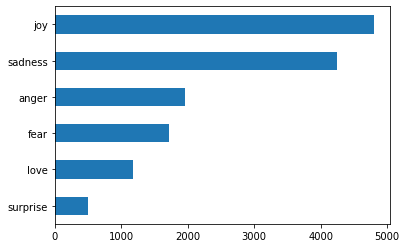

In [14]:
# Emotion distribution across the dataset:

data.Sentiment.value_counts(ascending = True).plot(kind = 'barh')

# **6. ML Model**

### Converting Target column from Text to Number using "Mapping"

In [15]:
data['Sentiment_number'] = data.Sentiment.map({'sadness':3, 'joy':0, 'love':2, 'anger':1, 'surprise':5, 'fear':4})

In [16]:
data.head()

,Id,Input,Sentiment,word_count_post_process,Sentiment_number
0,6491,i feel extremely discontent right now,sadness,4,3
1,7081,i have not gone a week without exaggerated eyelids since year at school i feel pretty fucking shitty,sadness,12,3
2,7598,i feel so thrilled to share with my fans because lots of my songs are inspiring,joy,7,0
3,15874,i wanted to because he loves me and i feel like if he cares enough about me even if he does not care about the wedding itself he should be more supporti have and not throw it in my face,love,12,2
4,12871,i feel we should not be supporting these rebels in a violent manner at all and particularly not gi have them weapons or funding,love,9,2


## 6.1 Using **BoW (Bag of Words)** to convert word to vector for Prediction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500, binary=True)
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(14393, 2500)

In [19]:
y = data.Sentiment_number

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16, stratify = y)

In [21]:
print("Shape of X train is", X_train.shape)
print("Shape of X test is", X_test.shape)
print("Shape of y train is", y_train.shape)
print("Shape of y test is", y_test.shape)

Shape of X train is (10794, 2500)
Shape of X test is (3599, 2500)
Shape of y train is (10794,)
Shape of y test is (3599,)


### Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100, random_state = 1)

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)

accuracy_train:  0.997313322216046
accuracy_test:  0.847457627118644


### Naive Bayes Model

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)

accuracy_train:  0.9064294978691866
accuracy_test:  0.7974437343706585


## 6.2 **TFIDF method** for word to vector

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 2500, binary=True)
X = tv.fit_transform(corpus).toarray()
y = data.Sentiment_number

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16, stratify = y)

In [26]:
print("Shape of X train is", X_train.shape)
print("Shape of X test is", X_test.shape)
print("Shape of y train is", y_train.shape)
print("Shape of y test is", y_test.shape)

Shape of X train is (10794, 2500)
Shape of X test is (3599, 2500)
Shape of y train is (10794,)
Shape of y test is (3599,)


### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100, random_state = 1)

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)

accuracy_train:  0.997313322216046
accuracy_test:  0.8391219783273132


### Naive Bayes Model

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)

accuracy_train:  0.8074856401704651
accuracy_test:  0.7352042233953876


## 6.3 **Word2Vec** method to convert word to Vector

In [29]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import gensim
from tqdm import tqdm

In [30]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [31]:
words[:2]

[['feel', 'extrem', 'discont', 'right'],
 ['gone',
  'week',
  'without',
  'exagger',
  'eyelid',
  'sinc',
  'year',
  'school',
  'feel',
  'pretti',
  'fuck',
  'shitti']]

In [32]:
model=gensim.models.Word2Vec(words,window=5,min_count=2, vector_size=1000)

In [33]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [34]:
X=[]
for i in (range(len(words))):  
  X.append(avg_word2vec(words[i]))
  

In [35]:
X = pd.DataFrame(X[0:len(X)])
X.shape

(14393, 1000)

In [36]:
y = data.Sentiment_number

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16, stratify = y)

In [38]:
print("Shape of X train is", X_train.shape)
print("Shape of X test is", X_test.shape)
print("Shape of y train is", y_train.shape)
print("Shape of y test is", y_test.shape)

Shape of X train is (10794, 1000)
Shape of X test is (3599, 1000)
Shape of y train is (10794,)
Shape of y test is (3599,)


### Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100, random_state = 1)

classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)

accuracy_train:  0.9977765425236242
accuracy_test:  0.3751041956098916


- A base model using **Random Forest** is created to see performance of **Word2Vec** technique.
- Next deep learning models using **LSTM RNN** shall be trained to get better model

# 7 **Deep Learning Model**

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras import optimizers

from nltk import sent_tokenize
from gensim.utils import simple_preprocess
import gensim
from tqdm import tqdm

## 7.1 OneHot representation

In [41]:
##Vocabulary size:
voc_size = 10000

In [42]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

onehot_repr = [one_hot(words,voc_size) for words in corpus]


In [43]:
len(words) #no. of unique words

14393

## 7.2 Embedding Representation

In [44]:
sent_length = 25
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
embedded_docs

array([[   0,    0,    0, ..., 9001,  275, 2917],
       [   0,    0,    0, ..., 6355, 4331, 4136],
       [   0,    0,    0, ..., 2115, 7424, 6123],
       ...,
       [   0,    0,    0, ..., 4966, 4449, 2765],
       [   0,    0,    0, ..., 3767, 5487, 8379],
       [   0,    0,    0, ..., 5548, 6886, 3810]], dtype=int32)

In [45]:
y = data.Sentiment_number
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=16, stratify = y)

print("Shape of X train is", X_train.shape)
print("Shape of X test is", X_test.shape)
print("Shape of y train is", y_train.shape)
print("Shape of y test is", y_test.shape)

Shape of X train is (10794, 25)
Shape of X test is (3599, 25)
Shape of y train is (10794,)
Shape of y test is (3599,)


## 7.1 First Model Creation

In [47]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 561,006
Trainable params: 561,006
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
169/169 [==============================] - 9s 10ms/step - loss: 1.4984 - accuracy: 0.4120 - val_loss: 1.1476 - val_accuracy: 0.5816
Epoch 2/100
169/169 [==============================] - 1s 7ms/step - loss: 0.7577 - accuracy: 0.7448 - val_loss: 0.6444 - val_accuracy: 0.7844
Epoch 3/100
169/169 [==============================] - 1s 7ms/step - loss: 0.3550 - accuracy: 0.8801 - val_loss: 0.5365 - val_accuracy: 0.8247
Epoch 4/100
169/169 [==============================] - 1s 7ms/step - loss: 0.2078 - accuracy: 0.9297 - val_loss: 0.5155 - val_accuracy: 0.8416
Epoch 5/100
169/169 [==============================] - 1s 7ms/step - loss: 0.1463 - accuracy: 0.9528 - val_loss: 0.5389 - val_accuracy: 0.8419
Epoch 6/100
169/169 [==============================] - 1s 7ms/step - loss: 0.1085 - accuracy: 0.9633 - val_loss: 0.5376 - val_accuracy: 0.8466
Epoch 7/100
169/169 [==============================] - 1s 8ms/step - loss: 0.0851 - accuracy: 0.9718 - val_loss: 0.5917 - val_accuracy: 0.847

In [49]:
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

y_pred_train = np.argmax(y_pred_train_prob,axis=1)
y_pred_test= np.argmax(y_pred_test_prob,axis=1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)


accuracy_train:  0.9949045766166389
accuracy_test:  0.8307863295359822


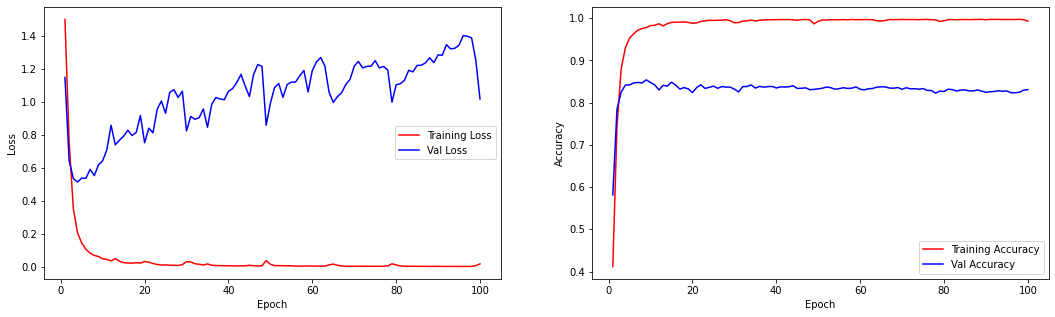

In [50]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,5))

training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r-')
ax1.plot(epoch_count, val_loss, 'b-')
ax1.legend(['Training Loss', 'Val Loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
ax2.plot(epoch_count, training_acc, 'r-')
ax2.plot(epoch_count, val_acc, 'b-')
ax2.legend(['Training Accuracy', 'Val Accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.show();

## 7.4 Improving Model Performance

### BN & Dropout

In [ ]:
embedding_vector_features = 50
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 50)            250000    
                                                                 
 batch_normalization_2 (Batc  (None, 40, 50)           200       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1000)              4204000   
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1000)             

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001,patience=30)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 16, verbose=1, callbacks = [es])

Epoch 1/100
675/675 [==============================] - 14s 18ms/step - loss: 1.9053 - accuracy: 0.3038 - val_loss: 2.1437 - val_accuracy: 0.2986
Epoch 2/100
675/675 [==============================] - 10s 15ms/step - loss: 1.6924 - accuracy: 0.3861 - val_loss: 1.7753 - val_accuracy: 0.3400
Epoch 3/100
675/675 [==============================] - 10s 15ms/step - loss: 1.5372 - accuracy: 0.4555 - val_loss: 1.6523 - val_accuracy: 0.4014
Epoch 4/100
675/675 [==============================] - 10s 15ms/step - loss: 1.3831 - accuracy: 0.5131 - val_loss: 2.2834 - val_accuracy: 0.2022
Epoch 5/100
675/675 [==============================] - 10s 16ms/step - loss: 1.3200 - accuracy: 0.5400 - val_loss: 1.7226 - val_accuracy: 0.3625
Epoch 6/100
675/675 [==============================] - 11s 16ms/step - loss: 1.0676 - accuracy: 0.6444 - val_loss: 1.8879 - val_accuracy: 0.4394
Epoch 7/100
675/675 [==============================] - 11s 16ms/step - loss: 0.8931 - accuracy: 0.7123 - val_loss: 1.3642 - val_ac

In [ ]:
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

y_pred_train = np.argmax(y_pred_train_prob,axis=1)
y_pred_test= np.argmax(y_pred_test_prob,axis=1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)


accuracy_train:  0.9942592592592593
accuracy_test:  0.8391666666666666


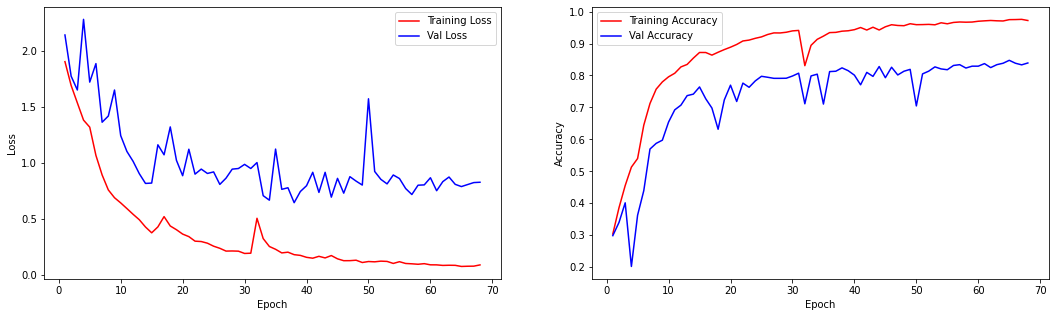

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,5))

training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r-')
ax1.plot(epoch_count, val_loss, 'b-')
ax1.legend(['Training Loss', 'Val Loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
ax2.plot(epoch_count, training_acc, 'r-')
ax2.plot(epoch_count, val_acc, 'b-')
ax2.legend(['Training Accuracy', 'Val Accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.show();

### 2 LSTM layers

In [ ]:
embedding_vector_features = 400
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(300))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 40, 400)           4000000   
                                                                 
 batch_normalization_20 (Bat  (None, 40, 400)          1600      
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 40, 400)           0         
                                                                 
 lstm_14 (LSTM)              (None, 40, 200)           480800    
                                                                 
 batch_normalization_21 (Bat  (None, 40, 200)          800       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 40, 200)          

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001,patience=30)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 32, verbose=1, callbacks = [es])

Epoch 1/100
338/338 [==============================] - 9s 16ms/step - loss: 1.4348 - accuracy: 0.5053 - val_loss: 1.4013 - val_accuracy: 0.5549
Epoch 2/100
338/338 [==============================] - 5s 15ms/step - loss: 0.4052 - accuracy: 0.8650 - val_loss: 0.4183 - val_accuracy: 0.8608
Epoch 3/100
338/338 [==============================] - 5s 15ms/step - loss: 0.2380 - accuracy: 0.9170 - val_loss: 0.4034 - val_accuracy: 0.8705
Epoch 4/100
338/338 [==============================] - 5s 13ms/step - loss: 0.1648 - accuracy: 0.9433 - val_loss: 0.4234 - val_accuracy: 0.8758
Epoch 5/100
338/338 [==============================] - 5s 13ms/step - loss: 0.1214 - accuracy: 0.9578 - val_loss: 0.4791 - val_accuracy: 0.8672
Epoch 6/100
338/338 [==============================] - 4s 13ms/step - loss: 0.0961 - accuracy: 0.9658 - val_loss: 0.5230 - val_accuracy: 0.8622
Epoch 7/100
338/338 [==============================] - 5s 14ms/step - loss: 0.0800 - accuracy: 0.9724 - val_loss: 0.5433 - val_accuracy:

In [ ]:
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

y_pred_train = np.argmax(y_pred_train_prob,axis=1)
y_pred_test= np.argmax(y_pred_test_prob,axis=1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)


accuracy_train:  0.9972206781545303
accuracy_test:  0.8635732147818839


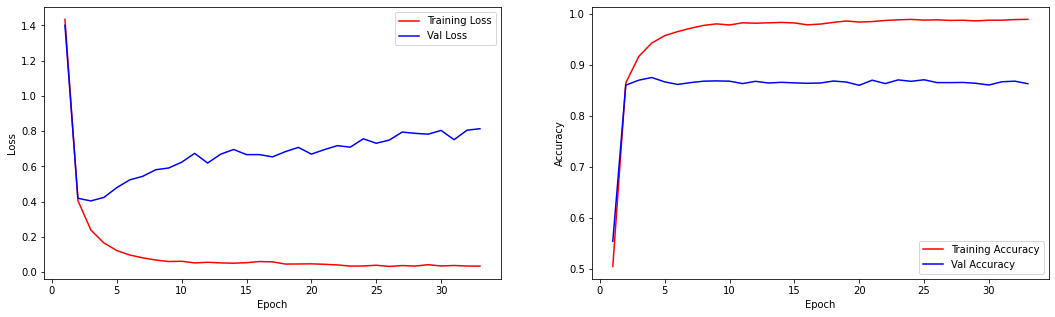

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,5))

training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r-')
ax1.plot(epoch_count, val_loss, 'b-')
ax1.legend(['Training Loss', 'Val Loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
ax2.plot(epoch_count, training_acc, 'r-')
ax2.plot(epoch_count, val_acc, 'b-')
ax2.legend(['Training Accuracy', 'Val Accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.show();

### LSTM layers finetuning

In [ ]:
embedding_vector_features = 500
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(200, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 25, 500)           5000000   
                                                                 
 batch_normalization_20 (Bat  (None, 25, 500)          2000      
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 25, 500)           0         
                                                                 
 lstm_13 (LSTM)              (None, 25, 200)           560800    
                                                                 
 batch_normalization_21 (Bat  (None, 25, 200)          800       
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 25, 200)          

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001,patience=30)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size = 32, verbose=1, callbacks = [es])

Epoch 1/100
338/338 [==============================] - 87s 240ms/step - loss: 1.4728 - accuracy: 0.4941 - val_loss: 1.1839 - val_accuracy: 0.5507
Epoch 2/100
338/338 [==============================] - 79s 234ms/step - loss: 0.4628 - accuracy: 0.8442 - val_loss: 0.3811 - val_accuracy: 0.8597
Epoch 3/100
338/338 [==============================] - 78s 231ms/step - loss: 0.2616 - accuracy: 0.9096 - val_loss: 0.3899 - val_accuracy: 0.8722
Epoch 4/100
338/338 [==============================] - 79s 233ms/step - loss: 0.1794 - accuracy: 0.9365 - val_loss: 0.4240 - val_accuracy: 0.8622
Epoch 5/100
338/338 [==============================] - 79s 232ms/step - loss: 0.1360 - accuracy: 0.9511 - val_loss: 0.4658 - val_accuracy: 0.8641
Epoch 6/100
338/338 [==============================] - 77s 229ms/step - loss: 0.1055 - accuracy: 0.9648 - val_loss: 0.4908 - val_accuracy: 0.8702
Epoch 7/100
338/338 [==============================] - 79s 233ms/step - loss: 0.0862 - accuracy: 0.9682 - val_loss: 0.5684 -

In [ ]:
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

y_pred_train = np.argmax(y_pred_train_prob,axis=1)
y_pred_test= np.argmax(y_pred_test_prob,axis=1)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('accuracy_train: ', accuracy_train)
print('accuracy_test: ', accuracy_test)


accuracy_train:  0.997035390031499
accuracy_test:  0.8766323978883023


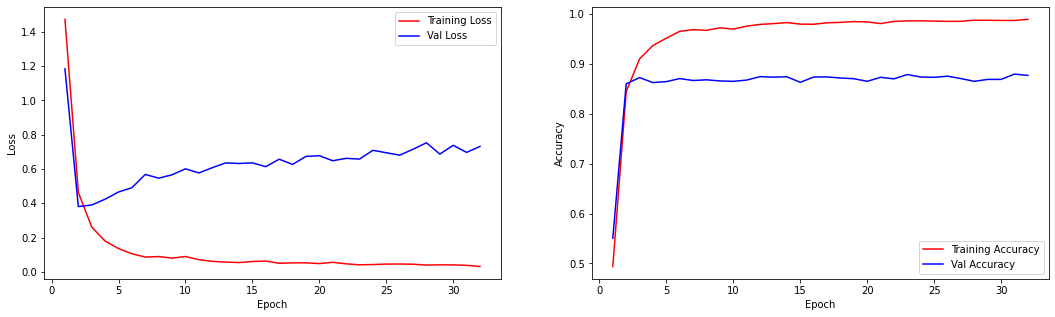

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,5))

training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r-')
ax1.plot(epoch_count, val_loss, 'b-')
ax1.legend(['Training Loss', 'Val Loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_acc) + 1)

# Visualize loss history
ax2.plot(epoch_count, training_acc, 'r-')
ax2.plot(epoch_count, val_acc, 'b-')
ax2.legend(['Training Accuracy', 'Val Accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.show();

## 7.5 Hyperparameter Tuning using Keras Tuner

In [ ]:
#!pip install keras-tuner
import kerastuner as kt
from kerastuner import HyperModel as hp
from kerastuner import RandomSearch, Hyperband, BayesianOptimization

#### 7.5.1 Using RandomSearch Tuner

In [ ]:
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        embedding_vector_features = hp.Int("embed_vec_featr",min_value=50, max_value=1000, step=50)
        #voc_size = 10000                  #hp.Int("voc_size",min_value=2000, max_value=10000, step=2000)
        #sent_length = 25                  #hp.Int("sent_length",min_value=20, max_value=50, step=5)
        
        model = Sequential()
        model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))


        num_layers = hp.Int('num_layers', 1, 5) 
        for i in range(num_layers): 

          if i < num_layers - 1: 
            model.add(LSTM(units=hp.Int("units",min_value=50, max_value=500, step=50), 
                          activation=hp.Choice("activation", ["relu", "tanh"]), return_sequences = True)) 
            model.add(BatchNormalization()) 
            model.add(Dropout(0.3)) 
          
          else: 
            model.add(LSTM(units=hp.Int("units",min_value=50, max_value=500, step=50), 
                          activation=hp.Choice("activation", ["relu", "tanh"]))) 
            model.add(BatchNormalization()) 
            model.add(Dropout(0.3)) 

        model.add(layers.Dense(6, activation="softmax"))
        model.compile(optimizer=optimizers.Adam(hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
                      loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32, 64]),
            **kwargs,
        )



In [ ]:
tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
)

tuner.search_space_summary()

Search space summary
Default search space size: 5
embed_vec_featr (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 1000, 'step': 50, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 500, 'step': 50, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.001,patience=3)

tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1, callbacks = [es],)

Trial 10 Complete [00h 04m 10s]
val_accuracy: 0.34454014897346497

Best val_accuracy So Far: 0.8849680423736572
Total elapsed time: 00h 58m 02s


In [ ]:
tuner.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
embed_vec_featr: 900
num_layers: 3
units: 300
activation: relu
lr: 0.00011952821922571687
batch_size: 16
Score: 0.8849680423736572


In [ ]:
models1 = tuner.get_best_models(num_models = 1)
train_results = models1[0].evaluate(X_train, y_train)
test_results = models1[0].evaluate(X_test, y_test)

print("Train Results:", train_results)
print("Test Results:", test_results)

113/113 [==============================] - 2s 14ms/step - loss: 0.4061 - accuracy: 0.8850
Train Results: [0.036795005202293396, 0.9894385933876038]
Test Results: [0.4061104655265808, 0.8849680423736572]


In [ ]:
best_model1 = models1[0]
best_model1.save(filepath = r'/./model1.h5')


#### 7.5.2 Using Bayesian Optimizer Tuner

In [ ]:
class MyHyperModel2(kt.HyperModel):
    def build(self, hp):
        embedding_vector_features = hp.Int("embed_vec_featr",min_value=50, max_value=1000, step=50)
        #voc_size = 10000                  #hp.Int("voc_size",min_value=2000, max_value=10000, step=2000)
        #sent_length = 25                  #hp.Int("sent_length",min_value=20, max_value=50, step=5)
        
        model = Sequential()
        model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))


        num_layers = hp.Int('num_layers', 1, 5) 
        for i in range(num_layers): 

          if i < num_layers - 1: 
            model.add(LSTM(units=hp.Int("units",min_value=50, max_value=500, step=50), 
                          activation=hp.Choice("activation", ["relu", "tanh"]), return_sequences = True)) 
            model.add(BatchNormalization()) 
            model.add(Dropout(0.3)) 
          
          else: 
            model.add(LSTM(units=hp.Int("units",min_value=50, max_value=500, step=50), 
                          activation=hp.Choice("activation", ["relu", "tanh"]))) 
            model.add(BatchNormalization()) 
            model.add(Dropout(0.3)) 

        model.add(layers.Dense(6, activation="softmax"))
        model.compile(optimizer=optimizers.Adam(hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")),
                      loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32, 64]),
            **kwargs,
        )

In [ ]:
tuner2 = kt.BayesianOptimization(
            MyHyperModel2(),
            objective='val_accuracy',
            max_trials=10,
            overwrite=True,
        )
tuner2.search_space_summary()

Search space summary
Default search space size: 5
embed_vec_featr (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 1000, 'step': 50, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 500, 'step': 50, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=3)

tuner2.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1, callbacks = [es],)

Trial 10 Complete [00h 00m 20s]
val_accuracy: 0.8669074773788452

Best val_accuracy So Far: 0.8669074773788452
Total elapsed time: 00h 25m 27s


In [ ]:
tuner2.results_summary(num_trials=1)

Results summary
Results in ./untitled_project
Showing 1 best trials
Trial summary
Hyperparameters:
embed_vec_featr: 1000
num_layers: 1
units: 350
activation: tanh
lr: 0.0009242959051252621
batch_size: 64
Score: 0.8669074773788452


In [ ]:
models2 = tuner2.get_best_models(num_models = 1)
train_results = models2[0].evaluate(X_train, y_train)
test_results = models2[0].evaluate(X_test, y_test)

print("Train Results:", train_results)
print("Test Results:", test_results)

113/113 [==============================] - 1s 6ms/step - loss: 0.5222 - accuracy: 0.8669
Train Results: [0.020704170688986778, 0.9924958348274231]
Test Results: [0.5221570134162903, 0.8669074773788452]


In [ ]:
best_model2 = models2[0]
best_model2.save(filepath = r'/./model2.h5')


# 8 Inferencing

## 8.1 Importing & Performing Pre-processing

In [ ]:
test_data = pd.read_csv(r'/./emotion_test.csv' )

print('Data Shape:', test_data.shape)
test_data.head(5)

Data Shape: (3600, 2)


,Id,Input
0,10779,i could almost feel it as the flames singed and tortured her frail delicate body leaving nothing behind but a foul smelling concoction of wood and burnt flesh
1,2247,i realise im sounding surprisingly like every other person on this site i wish i liked mud wrestling or something a bit more outrageous i feel rather dull and dare i say average
2,11765,i have all of that obviously because of what i do on youtube and my blog and while i have a ton i like that i can feel ok about it because i have it managed in a nice and organized way
3,14390,i cannot speak for others but all i know is i feel i am the most successful prettiest version of myself when i walk out of my starbucks with my red cup holiday cup in hand
4,388,im pretty happy but a little on the nauseated side to feel thrilled


In [ ]:
for i in range(test_data.Input.shape[0]):
  for j in range(len(proper_words)):
    a = improper_words[j]
    b = proper_words[j]
    test_data.Input[i] = test_data.Input[i].replace(a, b)

In [ ]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

test_corpus = []
for i in range (0, len(test_data)):
  review = re.sub('[^a-zA-Z0-9]', ' ', test_data['Input'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  

  review = ' '.join(review)
  test_corpus.append(review)
# took 1.5mins

In [ ]:
test_data['word_count_post_process'] = test_data['Input']
for i in range(0,len(test_data)):
  test_data['word_count_post_process'][i] = len(test_corpus[i].split())

In [ ]:
print("Max word count of post-processed sentence is ", test_data['word_count_post_process'].max())
print("Min word count of post-processed sentence is ", test_data['word_count_post_process'].min())

Max word count of post-processed sentence is  35
Min word count of post-processed sentence is  1


In [ ]:
# Hyperparameters from model1.h5:
# embed_vec_featr: 900
# num_layers: 3
# units: 300
# activation: relu
# lr: 0.00011952821922571687
# batch_size: 16
# Score: 0.8849680423736572

embedding_vector_features = 900
voc_size1 = 10000
sent_length1 = 25

test_onehot_repr = [one_hot(words,voc_size1) for words in test_corpus]

### Embedding
test_embedded_docs = pad_sequences(test_onehot_repr, padding = 'pre', maxlen = sent_length1)

### Preparing X :
X_test_final = np.array(test_embedded_docs)

In [ ]:
#Loading the model, model1.h5

from tensorflow.keras import models 
Loaded_model1 = models.load_model('/./model1.h5')

In [ ]:
y_test_prediction = np.argmax(Loaded_model1.predict(X_test_final),axis=1)

In [ ]:
final_df = test_data.copy()

In [ ]:
final_df['Sentiment_number'] = y_test_prediction
final_df.Sentiment_number.value_counts()

0    1270
3    1026
4     480
1     442
2     237
5     145
Name: Sentiment_number, dtype: int64

In [ ]:
#reverse mapping to verify:

final_df['Sentiment'] = final_df.Sentiment_number.map({3:'sadness', 0:'joy', 2:'love', 1:'anger', 5:'surprise', 4:'fear'})

In [ ]:
final_df.head()

,Id,Input,word_count_post_process,Sentiment_number,Sentiment
0,10779,i could almost feel it as the flames singed and tortured her frail delicate body leaving nothing behind but a foul smelling concoction of wood and burnt flesh,18,3,sadness
1,2247,i realise i am sounding surprisingly like every other person on this site i wish i liked mud wrestling or something a bit more outrageous i feel rather dull and dare i say average,20,3,sadness
2,11765,i have all of that obviously because of what i do on youtube and my blog and while i have a ton i like that i can feel ok about it because i have it managed in a nice and organized way,11,0,joy
3,14390,i cannot speak for others but all i know is i feel i am the most successful prettiest version of myself when i walk out of my starbucks with my red cup holiday cup in hand,14,0,joy
4,388,i am pretty happy but a little on the nauseated side to feel thrilled,7,0,joy


# 9 Conclusion

The model developed can be used for training any robot to predict a emotion from sentence. 

#### Application:
- The model can be used in applications like Siri, Alexa, Sentiment Analysis, Social media listening, etc